In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
from object_detection.protos import input_reader_pb2
from object_detection.data_decoders.tf_example_decoder import TfExampleDecoder

In [2]:
record_iterator = tf.python_io.tf_record_iterator(path='../images/val-00000-of-00008')
decoder = TfExampleDecoder(load_instance_masks=True, instance_mask_type=input_reader_pb2.PNG_MASKS)

In [3]:
"""
# count number of images
count = 0
while True:
    try:
        next(record_iterator)
        count += 1
    except:
        break
print(count)
"""

'\n# count number of images\ncount = 0\nwhile True:\n    try:\n        next(record_iterator)\n        count += 1\n    except:\n        break\nprint(count)\n'

In [4]:
data_string = next(record_iterator)
tensor_dict = decoder.decode(data_string)

In [5]:
# get label in the record
def decode_string(data_string):
    example = tf.train.Example()
    example.ParseFromString(data_string)
    return example

example = decode_string(data_string)
print(example.features.feature)

In [6]:
tensor_dict

{'filename': <tf.Tensor 'Reshape_2:0' shape=() dtype=string>,
 'groundtruth_area': <tf.Tensor 'SparseToDense_2:0' shape=(1,) dtype=float32>,
 'groundtruth_boxes': <tf.Tensor 'transpose:0' shape=(?, 4) dtype=float32>,
 'groundtruth_classes': <tf.Tensor 'SparseToDense_4:0' shape=(0,) dtype=int64>,
 'groundtruth_difficult': <tf.Tensor 'SparseToDense_3:0' shape=(0,) dtype=int64>,
 'groundtruth_group_of': <tf.Tensor 'SparseToDense_5:0' shape=(0,) dtype=int64>,
 'groundtruth_image_classes': <tf.Tensor 'SparseToDense:0' shape=(0,) dtype=int64>,
 'groundtruth_instance_masks': <tf.Tensor 'cond/Merge:0' shape=(?, ?, ?) dtype=float32>,
 'groundtruth_is_crowd': <tf.Tensor 'Cast:0' shape=(1,) dtype=bool>,
 'groundtruth_weights': <tf.Tensor 'cond_1/Merge:0' shape=(?,) dtype=float32>,
 'image': <tf.Tensor 'case/cond/Merge:0' shape=(?, ?, 3) dtype=uint8>,
 'key': <tf.Tensor 'Reshape_5:0' shape=() dtype=string>,
 'original_image_spatial_shape': <tf.Tensor 'strided_slice:0' shape=(2,) dtype=int32>,
 'so

In [7]:
data_string = next(record_iterator)
tensor_dict = decoder.decode(data_string)
with tf.Session() as sess:
    image = tensor_dict['image'].eval()
    bbox = tensor_dict['groundtruth_boxes'].eval()
    segmentation = tensor_dict['groundtruth_instance_masks'].eval()

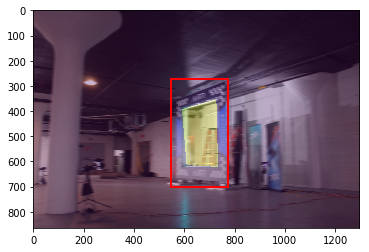

In [8]:
fig, ax = plt.subplots(1)
ax.imshow(image)
ax.imshow(segmentation[0], interpolation='none', alpha=0.3)

h, w, _ = image.shape
ymin, xmin, ymax, xmax = bbox[0,:]
ymin = int(h*ymin)
xmin = int(w*xmin)
ymax = int(h*ymax)
xmax = int(w*xmax)
rect_w = xmax - xmin
rect_h = ymax - ymin
rect = patches.Rectangle((xmin, ymin), rect_w, rect_h, linewidth=2, edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)